In [23]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install plorts
import os
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import linear_regression
import matplotlib.pyplot as plt
import plorts

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.lines import Line2D

import energy_analysis_helpers

In [24]:
FIG_SIZE = (8,5)
FIG_SIZE_HALF = (4,4.7)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [25]:
N_CORES_TOT = 32

# EXP_ID = '230524-1158'
# data_folder = '../data/' + EXP_ID + '/'
# exp_filename = data_folder + 'energy.log'
# exp_filename = os.path.join(os.getcwd(), '/energy_cum.log') 
exp_filename = os.getcwd() + '/energy_cum.log'
print("os.getcwd() ="+os.getcwd())
print("exp_filename =" +exp_filename)
# if (SAVE_FIG):
#     out_dir = '../outputs/' + EXP_ID + '/'
#     if (not os.path.exists(out_dir)):
#         os.mkdir(out_dir)

# print ("exp_filename =" + exp_filename)
data_folder = os.getcwd()+'/json_cum/'
print("data_folder ="+data_folder)

os.getcwd() =/Users/wencai/Desktop/git/stanford_script_results
exp_filename =/Users/wencai/Desktop/git/stanford_script_results/energy_cum.log
data_folder =/Users/wencai/Desktop/git/stanford_script_results/json_cum/


# Reading the Experiment Data

In [26]:
exp_df = energy_analysis_helpers.read_energy_log(exp_filename)
exp_df['energy_J'] = exp_df['energy_uJ'] / 1000000
exp_df = energy_analysis_helpers.read_iperf_log(exp_df, data_folder)
exp_df

,cc,mtu,bitrate,n_core,duration,cnt,energy_uJ,energy_J,total_cpu_util_percent,user_cpu_util_percent,system_cpu_util_percent,time_sec,sent_bytes,bps,rtx_pkts,min_rtt,mean_rtt,max_rtt,max_cwnd
0,stress,9000,0,0,10.0,1,4.295966e+08,429.596556,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,stress,9000,0,0,10.0,2,4.296475e+08,429.647460,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,stress,9000,0,0,10.0,3,4.297028e+08,429.702817,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,stress,9000,0,0,10.0,4,4.296423e+08,429.642333,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,stress,9000,0,0,10.0,5,4.296362e+08,429.636229,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4330,cubic,9000,10,0,100.0,6,4.304462e+09,4304.461943,4.705822,0.165852,4.539971,100.000069,1.176987e+10,9.415891e+08,0.0,2.180,2.188,2.197,366344.0
4331,cubic,9000,10,0,100.0,7,4.306609e+09,4306.609397,4.573545,0.160217,4.413328,100.000068,1.176987e+10,9.415892e+08,0.0,1.677,1.794,1.911,364896.0
4332,cubic,9000,10,0,100.0,8,4.304839e+09,4304.839139,4.637267,0.131247,4.506019,100.000068,1.177027e+10,9.416206e+08,0.0,2.214,2.224,2.234,451776.0
4333,cubic,9000,10,0,100.0,9,4.308077e+09,4308.077411,4.450651,0.182561,4.268091,100.000068,1.177000e+10,9.415996e+08,0.0,2.162,2.186,2.210,390960.0


# Energy Consumption Analysis

In [27]:
energy_per_time_df = []
for cca, df in exp_df.groupby('cc'):
    if (cca in ['stress', 'sleep']):
        for n_core, ddf in df.groupby('n_core'):
            slope, _ = linear_regression(ddf['time_sec'], ddf['energy_J'], proportional=True)
            energy_per_time_df.append([cca, 0, n_core, slope])
    else:
        for bitrate, ddf in df.groupby('bitrate'):
            for n_core, dddf in ddf.groupby('n_core'):
                slope, _ = linear_regression(dddf['time_sec'], dddf['energy_J'], proportional=True)
                energy_per_time_df.append([cca, bitrate, n_core, slope])
energy_per_time_df = pd.DataFrame(energy_per_time_df, columns=['cc', 'bitrate', 'n_core', 'power_W'])
energy_per_time_df

,cc,bitrate,n_core,power_W
0,cubic,1,0,43.103485
1,cubic,1,8,65.555930
2,cubic,1,16,83.520457
3,cubic,1,24,86.295249
4,cubic,2,0,43.111437
5,cubic,2,8,65.580796
6,cubic,2,16,83.577401
7,cubic,2,24,86.223732
8,cubic,3,0,43.099492
9,cubic,3,8,65.526909


In [55]:
overhead_energy = \
    energy_per_time_df[energy_per_time_df.cc=='stress'][['n_core', 'power_W']].copy().set_index('n_core').to_dict()['power_W']
energy_per_time_df['power_W_noOverhead'] = \
    energy_per_time_df.apply(lambda row: row['power_W'] - overhead_energy[row['n_core']], axis=1)
print (energy_per_time_df)

        cc  bitrate  n_core    power_W  power_W_noOverhead
0    cubic        1       0  43.103485            0.215072
1    cubic        1       8  65.555930            0.549897
2    cubic        1      16  83.520457            0.440442
3    cubic        1      24  86.295249            0.352590
4    cubic        2       0  43.111437            0.223025
5    cubic        2       8  65.580796            0.574763
6    cubic        2      16  83.577401            0.497386
7    cubic        2      24  86.223732            0.281073
8    cubic        3       0  43.099492            0.211079
9    cubic        3       8  65.526909            0.520876
10   cubic        3      16  83.639996            0.559980
11   cubic        3      24  86.214373            0.271714
12   cubic        4       0  43.093274            0.204862
13   cubic        4       8  65.525543            0.519510
14   cubic        4      16  83.801165            0.721149
15   cubic        4      24  86.179713            0.2370

In [29]:
matrix = energy_per_time_df.pivot(index='bitrate', columns='n_core', values='power_W')
print('=== Power Consumption of Traffic and Background Cores (W) ===\n')
print(matrix)

=== Power Consumption of Traffic and Background Cores (W) ===

n_core          0          8          16         24
bitrate                                            
0        42.888413  65.006033  83.080016  85.942659
1        43.103485  65.555930  83.520457  86.295249
2        43.111437  65.580796  83.577401  86.223732
3        43.099492  65.526909  83.639996  86.214373
4        43.093274  65.525543  83.801165  86.179713
5        43.095938  65.489321  83.567970  86.151987
6        43.104999  65.533307  83.522205  86.250853
7        43.105379  65.521466  83.634171  86.349974
8        43.100124  65.517562  83.627725  86.311692
9        43.112029  65.518934  83.624044  86.207861
10       43.106825  65.513796  83.590641  86.153496


In [30]:
matrix = energy_per_time_df.pivot(index='bitrate', columns='n_core', values='power_W_noOverhead')
print('=== Power Consumption of Traffic Only (W) ===\n')
print(matrix)

=== Power Consumption of Traffic Only (W) ===

n_core         0         8         16        24
bitrate                                        
0        0.000000  0.000000  0.000000  0.000000
1        0.215072  0.549897  0.440442  0.352590
2        0.223025  0.574763  0.497386  0.281073
3        0.211079  0.520876  0.559980  0.271714
4        0.204862  0.519510  0.721149  0.237054
5        0.207525  0.483288  0.487954  0.209327
6        0.216586  0.527274  0.442190  0.308193
7        0.216966  0.515433  0.554155  0.407314
8        0.211711  0.511530  0.547709  0.369032
9        0.223616  0.512902  0.544029  0.265202
10       0.218413  0.507763  0.510626  0.210836


        cc  bitrate  n_core    power_W  power_W_noOverhead  power_W_per_gb  \
40  stress        0       0  42.888413            0.000000             NaN   
0    cubic        1       0  43.103485            0.215072       43.103485   
4    cubic        2       0  43.111437            0.223025       42.999925   
8    cubic        3       0  43.099492            0.211079       42.958772   
12   cubic        4       0  43.093274            0.204862       42.939628   
16   cubic        5       0  43.095938            0.207525       42.929918   
20   cubic        6       0  43.104999            0.216586       42.924510   
24   cubic        7       0  43.105379            0.216966       42.919408   
28   cubic        8       0  43.100124            0.211711       42.914877   
32   cubic        9       0  43.112029            0.223616       42.913259   
36   cubic       10       0  43.106825            0.218413       42.910254   

    W_full_speed  
40     42.888413  
0      42.910254  
4     

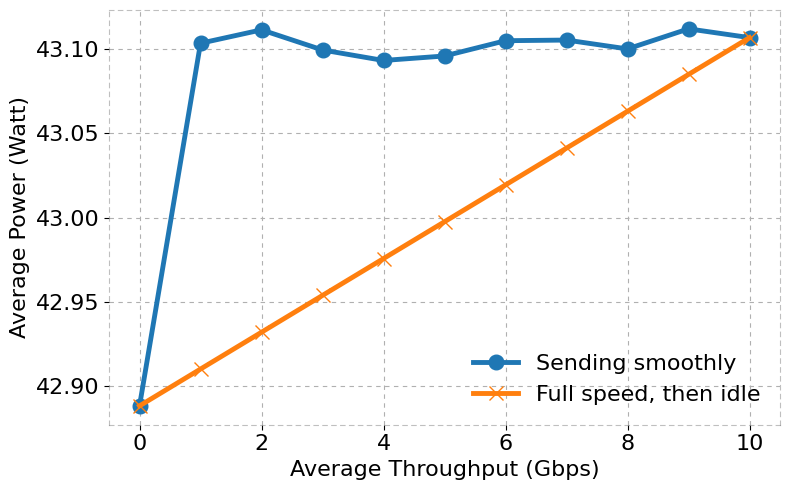

        cc  bitrate  n_core    power_W  power_W_noOverhead  power_W_per_gb  \
41  stress        0       8  65.006033            0.000000             NaN   
1    cubic        1       8  65.555930            0.549897       65.555930   
5    cubic        2       8  65.580796            0.574763       65.293414   
9    cubic        3       8  65.526909            0.520876       65.179658   
13   cubic        4       8  65.525543            0.519510       65.135910   
17   cubic        5       8  65.489321            0.483288       65.102690   
21   cubic        6       8  65.533307            0.527274       65.093912   
25   cubic        7       8  65.521466            0.515433       65.079666   
29   cubic        8       8  65.517562            0.511530       65.069974   
33   cubic        9       8  65.518934            0.512902       65.063022   
37   cubic       10       8  65.513796            0.507763       65.056809   

    W_full_speed  
41     65.006033  
1      65.056809  
5     

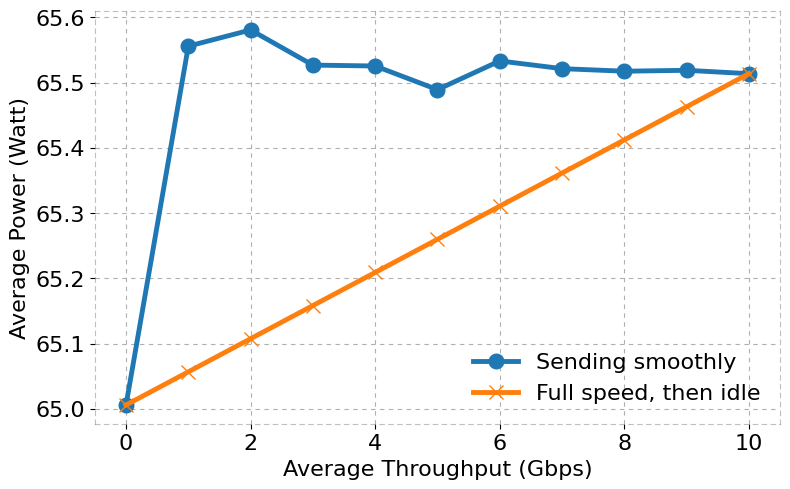

        cc  bitrate  n_core    power_W  power_W_noOverhead  power_W_per_gb  \
42  stress        0      16  83.080016            0.000000             NaN   
2    cubic        1      16  83.520457            0.440442       83.520457   
6    cubic        2      16  83.577401            0.497386       83.328708   
10   cubic        3      16  83.639996            0.559980       83.266676   
14   cubic        4      16  83.801165            0.721149       83.260303   
18   cubic        5      16  83.567970            0.487954       83.177606   
22   cubic        6      16  83.522205            0.442190       83.153714   
26   cubic        7      16  83.634171            0.554155       83.159181   
30   cubic        8      16  83.627725            0.547709       83.148479   
34   cubic        9      16  83.624044            0.544029       83.140463   
38   cubic       10      16  83.590641            0.510626       83.131078   

    W_full_speed  
42     83.080016  
2      83.131078  
6     

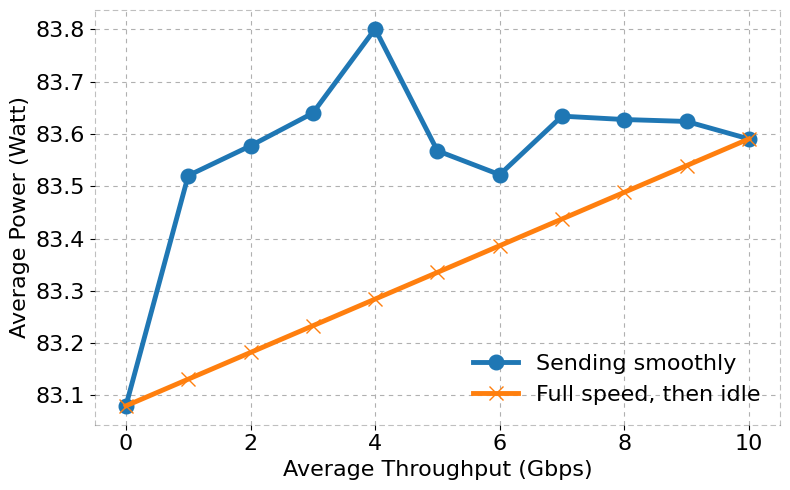

        cc  bitrate  n_core    power_W  power_W_noOverhead  power_W_per_gb  \
43  stress        0      24  85.942659            0.000000             NaN   
3    cubic        1      24  86.295249            0.352590       86.295249   
7    cubic        2      24  86.223732            0.281073       86.083196   
11   cubic        3      24  86.214373            0.271714       86.033231   
15   cubic        4      24  86.179713            0.237054       86.001923   
19   cubic        5      24  86.151987            0.209327       85.984525   
23   cubic        6      24  86.250853            0.308193       85.994025   
27   cubic        7      24  86.349974            0.407314       86.000847   
31   cubic        8      24  86.311692            0.369032       85.988788   
35   cubic        9      24  86.207861            0.265202       85.972126   
39   cubic       10      24  86.153496            0.210836       85.963743   

    W_full_speed  
43     85.942659  
3      85.963743  
7     

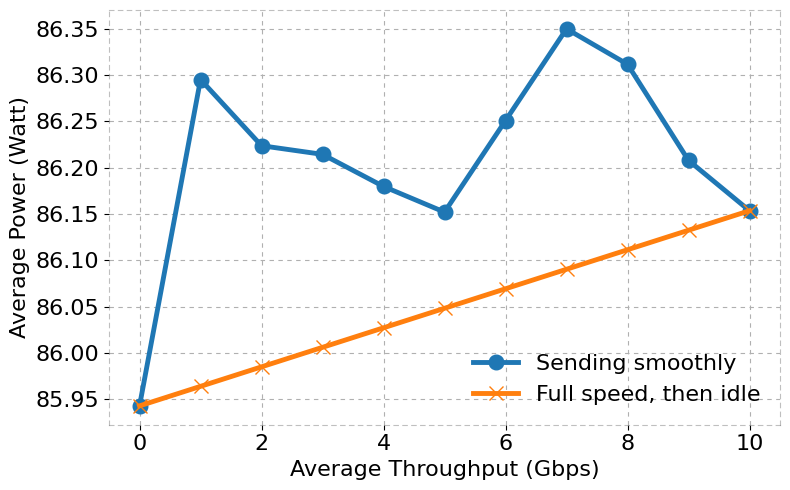

In [57]:
for n_core,df in energy_per_time_df.sort_values(by='bitrate').groupby('n_core'):
    idle_power_W = df[df.bitrate == 0].power_W.iloc[0]
    max_power_W = df[df.bitrate == 10].power_W.iloc[0]
    df['power_W_per_gb'] = df.power_W*1/df.bitrate + idle_power_W*(1 - 1/df.bitrate)
    df['W_full_speed'] = max_power_W*df.bitrate/10. + idle_power_W*(1 - df.bitrate/10.)
    print(df)

    plt.figure(figsize=FIG_SIZE)
    plt.plot(df.bitrate, df.power_W, marker='o', label='Sending smoothly', 
             linewidth=LINE_WIDTH, markersize=LINE_WIDTH*3)
    plt.plot(df.bitrate, df.W_full_speed, marker='x', label='Full speed, then idle', 
             linewidth=LINE_WIDTH, markersize=LINE_WIDTH*3)
    plt.ylabel("Average Power (Watt)", fontsize=FONT_SIZE)
    plt.xlabel("Average Throughput (Gbps)", fontsize=FONT_SIZE)
    plt.legend(loc='best')
    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    # if (n_core == 0):
    #     plt.ylim((0,df.W_full_speed.max()*1.07))
    plt.xticks(rotation = 0)
    plt.grid(linestyle=LINE_STYLE)
    leg = plt.gca().legend(loc='lower right', frameon=False, fontsize=FONT_SIZE)
    # plt.setp(leg.get_title(),fontsize=FONT_SIZE)
    plt.gca().spines["right"].set_linestyle(LINE_STYLE)
    plt.gca().spines["right"].set_alpha(0.5)
    plt.gca().spines["right"].set_color('gray')
    plt.gca().spines["left"].set_linestyle(LINE_STYLE)
    plt.gca().spines["left"].set_alpha(0.5)
    plt.gca().spines["left"].set_color('gray')
    # plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["top"].set_linestyle(LINE_STYLE)
    plt.gca().spines["top"].set_alpha(0.5)
    plt.gca().spines["top"].set_color('gray')
    # plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["bottom"].set_color('gray')

    plt.tight_layout()
    # plt.subplots_adjust(right=0.3, top=0.1, bottom=0.05)

    if (SAVE_FIG):
        plt.savefig( out_dir + '/smooth_vs_bursty_{}_cores.pdf'.format(n_core))

    plt.show()

In [46]:
# for n_core,df in energy_per_time_df.sort_values(by='bitrate').groupby('n_core'):
#     idle_kJps = df[df.bitrate == 0].kJps.iloc[0]
#     max_kJps = df[df.bitrate == 10].kJps.iloc[0]
#     df['kJ_per_gb'] = df.kJps*1/df.bitrate + idle_kJps*(1 - 1/df.bitrate)
#     df['kJ_full_speed'] = max_kJps*df.bitrate/10. + idle_kJps*(1 - df.bitrate/10.)

#     plt.figure(figsize=FIG_SIZE)
#     plt.plot(df.bitrate, df.kJps, marker='o',
#              linewidth=LINE_WIDTH, markersize=LINE_WIDTH*3)
#     plt.ylabel("Average Rate of Energy (KJ/sec)", fontsize=FONT_SIZE)
#     plt.xlabel("Average Throughput (Gbps)", fontsize=FONT_SIZE)
#     plt.xticks(fontsize=FONT_SIZE)
#     plt.yticks(fontsize=FONT_SIZE)
#     if (n_core == 0):
#         plt.ylim((0,df.kJ_full_speed.max()*1.07))
#     plt.xticks(rotation = 0)
#     plt.grid(linestyle=LINE_STYLE)
#     # plt.setp(leg.get_title(),fontsize=FONT_SIZE)
#     plt.gca().spines["right"].set_linestyle(LINE_STYLE)
#     plt.gca().spines["right"].set_alpha(0.5)
#     plt.gca().spines["right"].set_color('gray')
#     plt.gca().spines["left"].set_linestyle(LINE_STYLE)
#     plt.gca().spines["left"].set_alpha(0.5)
#     plt.gca().spines["left"].set_color('gray')
#     # plt.gca().spines["top"].set_visible(False)
#     plt.gca().spines["top"].set_linestyle(LINE_STYLE)
#     plt.gca().spines["top"].set_alpha(0.5)
#     plt.gca().spines["top"].set_color('gray')
#     # plt.gca().spines["bottom"].set_visible(False)
#     plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
#     plt.gca().spines["bottom"].set_alpha(0.5)
#     plt.gca().spines["bottom"].set_color('gray')

#     plt.tight_layout()
#     # plt.subplots_adjust(right=0.3, top=0.1, bottom=0.05)

#     plt.show()

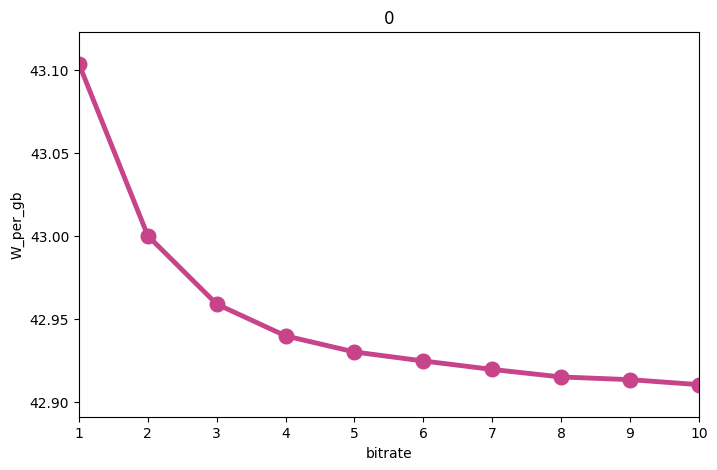

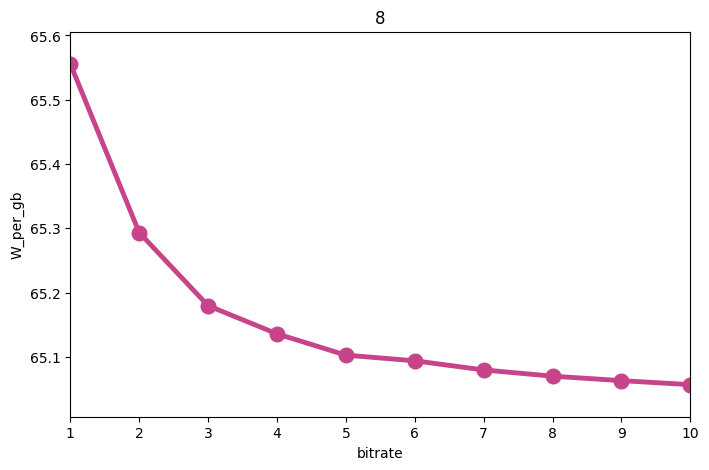

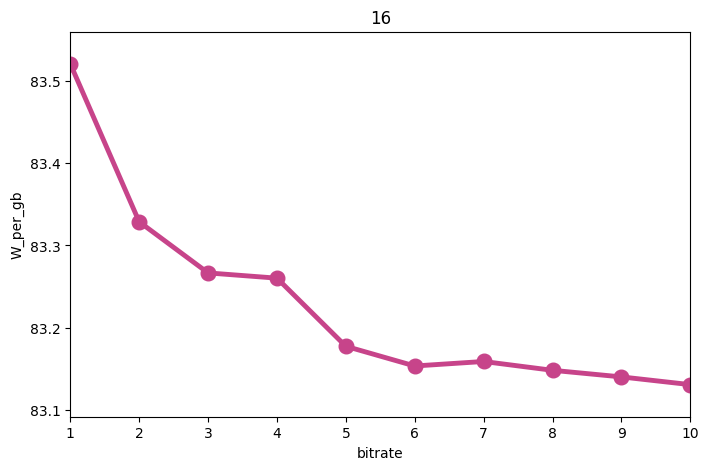

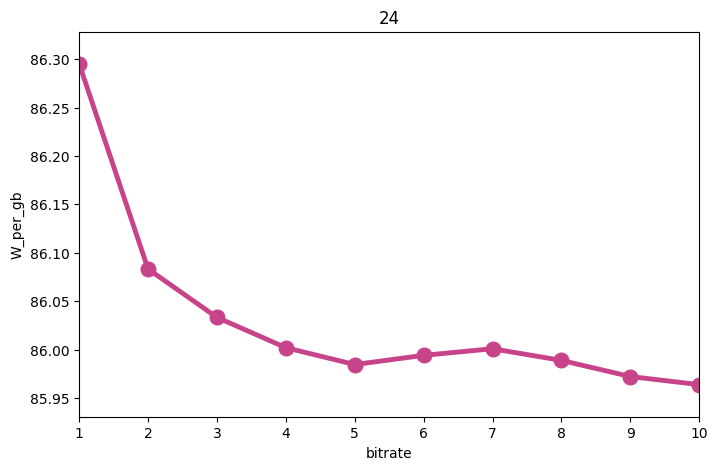

In [47]:
for n_core,df in energy_per_time_df.sort_values(by='bitrate').groupby('n_core'):
    idle_power_W = df[df.bitrate == 0].power_W.iloc[0]
    df['W_per_gb'] = df.power_W*1/df.bitrate + idle_power_W*(1 - 1/df.bitrate)
    plt.figure()
    plt.title(n_core)
    plorts.plot(df, x='bitrate', y='W_per_gb', marker='o', 
                linewidth=LINE_WIDTH, markersize=LINE_WIDTH*3)

In [48]:
energy_per_bitrate = {}
for _,row in energy_per_time_df[energy_per_time_df.n_core == 0].iterrows():
    energy_per_bitrate[row.bitrate] = row.power_W
energy_per_bitrate

{1: 43.10348504373171,
 2: 43.111437449421736,
 3: 43.099491806647315,
 4: 43.09327435981775,
 5: 43.09593805315088,
 6: 43.10499887597985,
 7: 43.10537864104524,
 8: 43.10012401415519,
 9: 43.1120285116644,
 10: 43.10682524521426,
 0: 42.8884126684183}

In [63]:
capacity = 10
file_size = capacity
duration = 2 * file_size / capacity
df = []
for fg_share_gbps in range(0,11):
    bg_share_gbps = capacity - fg_share_gbps
    if bg_share_gbps < fg_share_gbps:
        fct = file_size / fg_share_gbps
    else:
        fct = file_size / bg_share_gbps
        
    fg_left_to_send = file_size - fg_share_gbps * fct
    fg_full_time = fg_left_to_send / capacity
    fg_idle_time = duration - fct - fg_full_time
    fg_energy = energy_per_bitrate[fg_share_gbps]*fct + energy_per_bitrate[0]*fg_idle_time + energy_per_bitrate[10] * fg_full_time
    bg_left_to_send = file_size - bg_share_gbps*fct
    bg_full_time = bg_left_to_send / capacity
    bg_idle_time = duration - fct - bg_full_time
    bg_energy = energy_per_bitrate[bg_share_gbps]*fct + energy_per_bitrate[0]*bg_idle_time + energy_per_bitrate[10]*bg_full_time
    df.append({
        'capacity': capacity,
        'fct': fct,
        'fg_share_gbps':fg_share_gbps,
        'fg_idle_time':fg_idle_time,
        'fg_full_time': fg_full_time,
        'fg_energy':fg_energy,
        'bg_share_gbps':bg_share_gbps,
        'bg_left_to_send':bg_left_to_send,
        'bg_full_time':bg_full_time,
        'bg_idle_time':bg_idle_time,
        'bg_energy':bg_energy
    })
df = pd.DataFrame(df)
df['total_energy'] = df['fg_energy'] + df['bg_energy']
df

,capacity,fct,fg_share_gbps,fg_idle_time,fg_full_time,fg_energy,bg_share_gbps,bg_left_to_send,bg_full_time,bg_idle_time,bg_energy,total_energy
0,10,1.000000,0,0.000000e+00,1.000000,85.995238,10,0.000000,0.000000,1.000000e+00,85.995238,171.990476
1,10,1.111111,1,-1.110223e-16,0.888889,86.209939,9,0.000000,0.000000,8.888889e-01,86.025287,172.235227
2,10,1.250000,2,0.000000e+00,0.750000,86.219416,8,0.000000,0.000000,7.500000e-01,86.041465,172.260880
3,10,1.428571,3,0.000000e+00,0.571429,86.203174,7,0.000000,0.000000,5.714286e-01,86.086777,172.289951
4,10,1.666667,4,-5.551115e-17,0.333333,86.191066,6,0.000000,0.000000,3.333333e-01,86.137802,172.328868
5,10,2.000000,5,0.000000e+00,0.000000,86.191876,5,0.000000,0.000000,0.000000e+00,86.191876,172.383752
6,10,1.666667,6,3.333333e-01,0.000000,86.137802,4,3.333333,0.333333,-5.551115e-17,86.191066,172.328868
7,10,1.428571,7,5.714286e-01,0.000000,86.086777,3,5.714286,0.571429,0.000000e+00,86.203174,172.289951
8,10,1.250000,8,7.500000e-01,0.000000,86.041465,2,7.500000,0.750000,0.000000e+00,86.219416,172.260880
9,10,1.111111,9,8.888889e-01,0.000000,86.025287,1,8.888889,0.888889,-1.110223e-16,86.209939,172.235227


Text(0, 0.5, 'Energy used (kJ)')

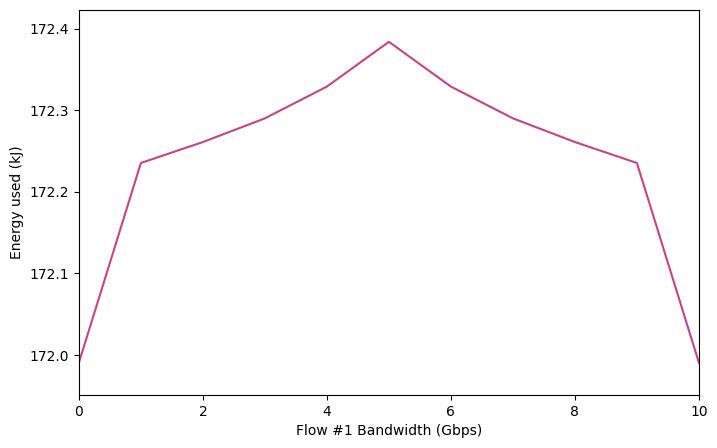

In [65]:
plorts.plot(df, x="fg_share_gbps", y='total_energy')
plt.xlabel("Flow #1 Bandwidth (Gbps)")
plt.ylabel("Energy used (kJ)")
# plt.axis(ymin=0)

In [51]:
# fair_energy = df[df.fg_share_gbps == 5].iloc[0].total_energy
# df['energy_savings_pct'] = 100.0*(df['total_energy'] - fair_energy)/fair_energy
# df['fg_share_pct'] = 10*df['fg_share_gbps']

# plorts.plot(df, x="fg_share_pct", y='energy_savings_pct')
# plt.ylabel("% energy used over fair share")
# plt.xlabel("% bandwidth used by Flow #1")
# plt.axhline(y=0, linestyle=":", color='grey')
# plt.axvline(x=50, linestyle=":", color='grey')
# plt.text(52, -10, "Fair share", size=15)
# plorts.style_axis()

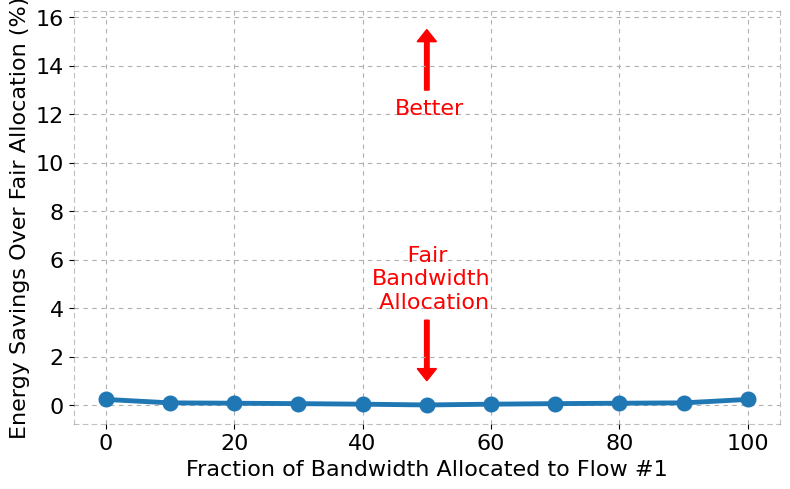

In [44]:
fair_energy = df[df.fg_share_gbps == 5].iloc[0].total_energy
df['energy_savings_pct'] = 100.0*(fair_energy - df['total_energy'])/fair_energy
df['fg_share_pct'] = 10*df['fg_share_gbps']

plt.figure(figsize=FIG_SIZE)
plt.plot(df.fg_share_pct, df.energy_savings_pct, marker='o', 
             linewidth=LINE_WIDTH, markersize=LINE_WIDTH*3)

plt.ylabel("Energy Savings Over Fair Allocation (%)", fontsize=FONT_SIZE)
plt.xlabel("Fraction of Bandwidth Allocated to Flow #1", fontsize=FONT_SIZE)
plt.arrow(50, 3.5, 0, -2, head_width=3, color='red', head_length=0.5, width=0.7)
plt.text(41.5, 4, "     Fair\nBandwidth\n Allocation", size=FONT_SIZE, color='red')
plt.arrow(50, 13, 0, 2, head_width=3, color='red', head_length=0.5, width=0.7)
plt.text(45, 12, "Better", size=FONT_SIZE, color='red')

plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
# plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')

plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/fairness_vs_energy.pdf')

plt.show()

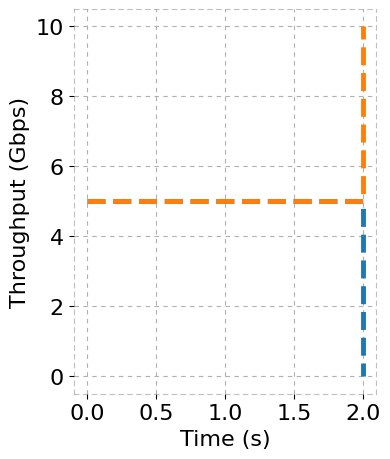

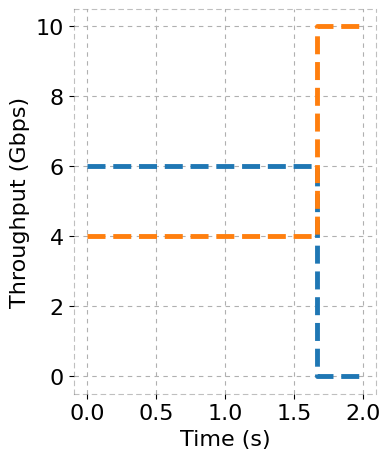

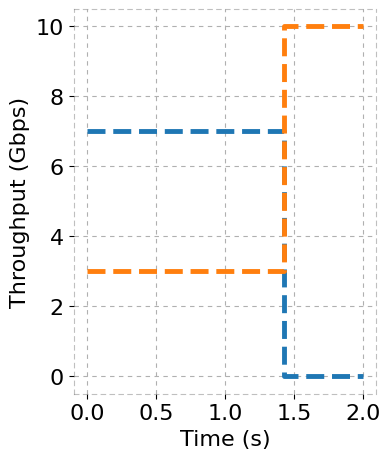

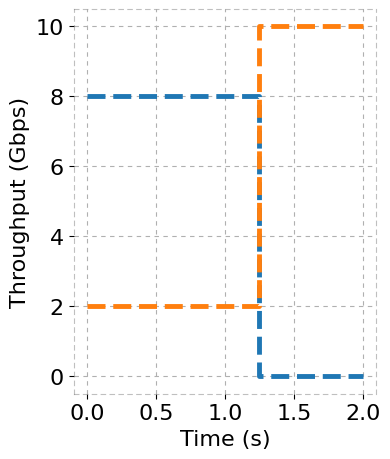

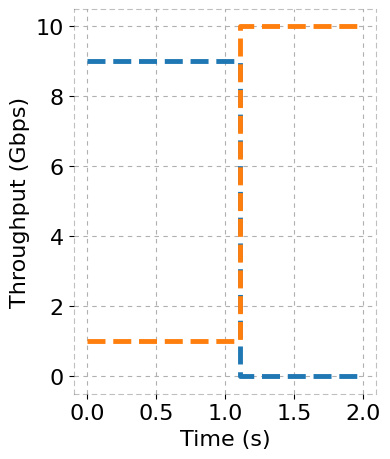

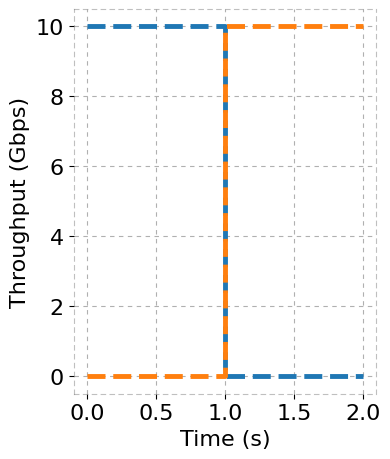

In [39]:
for _,exp in df.iterrows():
    if exp.fg_share_gbps < 5: continue
    plt.figure(figsize=FIG_SIZE_HALF)
    # plt.title(f"Flow #1 share: {exp.fg_share_gbps.astype(int)} Gbps")
    plt.plot([0, exp.fct, exp.fct, exp.fct + exp.bg_full_time], [exp.fg_share_gbps, exp.fg_share_gbps, 0, 0],
             '--', label="Flow #1", linewidth=LINE_WIDTH)
    plt.plot([0, exp.fct, exp.fct, exp.fct + exp.bg_full_time], [exp.bg_share_gbps, exp.bg_share_gbps, exp.capacity, exp.capacity],
             '--', label="Flow #2", linewidth=LINE_WIDTH)
    plt.xlabel("Time (s)", fontsize=FONT_SIZE)
    plt.ylabel("Throughput (Gbps)", fontsize=FONT_SIZE)

    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    plt.grid(linestyle=LINE_STYLE)
    plt.gca().spines["right"].set_linestyle(LINE_STYLE)
    plt.gca().spines["right"].set_alpha(0.5)
    plt.gca().spines["right"].set_color('gray')
    plt.gca().spines["left"].set_linestyle(LINE_STYLE)
    plt.gca().spines["left"].set_alpha(0.5)
    plt.gca().spines["left"].set_color('gray')
    # plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["top"].set_linestyle(LINE_STYLE)
    plt.gca().spines["top"].set_alpha(0.5)
    plt.gca().spines["top"].set_color('gray')
    # plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["bottom"].set_color('gray')

    plt.tight_layout()

    if (SAVE_FIG):
        plt.savefig( out_dir + '/experiment_trace_{:.0f}_gbps.pdf'.format(exp.fg_share_gbps))
    
    plt.show()

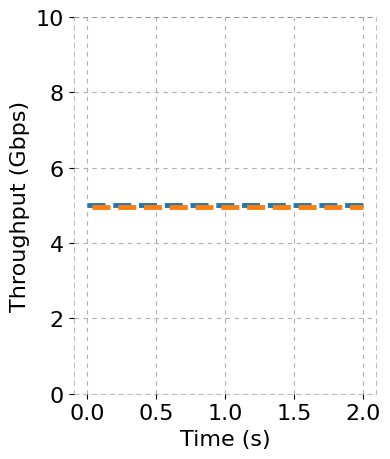

In [40]:
exp = df.iloc[5]

plt.figure(figsize=FIG_SIZE_HALF)
# plt.title(f"Flow #1 share: {exp.fg_share_gbps.astype(int)} Gbps")
plt.plot([0, exp.fct], [exp.fg_share_gbps, exp.fg_share_gbps], '--', label="Flow #1", linewidth=LINE_WIDTH)
plt.plot([0.03, exp.fct], [exp.bg_share_gbps-0.05, exp.bg_share_gbps-0.05], '--', label="Flow #2", linewidth=LINE_WIDTH)
plt.axis(ymin=0,ymax=10)
plt.xlabel("Time (s)", fontsize=FONT_SIZE)
plt.ylabel("Throughput (Gbps)", fontsize=FONT_SIZE)

plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.grid(linestyle=LINE_STYLE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
# plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')

plt.tight_layout()

if (SAVE_FIG):
        plt.savefig( out_dir + f'/experiment_trace_{exp.fg_share_gbps.astype(int)}_gbps.pdf')

plt.show()